In [10]:
# Authors: Daelon Kingore, Ashton Barnwell, Jacob Albrecht
# Stock Market prediction using Data Mining/AI algorithms


"""
Notes:Most of the models all worse than a coin flip so if we can find a way to improve them or use better models that would be awesome.
Some may just be good for very short range predictions, the way we split the data the models have to predict several years in the future,
which many of them cannot do.

TODO: 
Find optimal parameters (k-values), better evaluation strategies, predict future stock prices 
and other cool predictions to show, create graphs of stocks and future prediciton, and probably more.
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# gather data from csv
data = pd.read_csv('ORLY.csv')

# drop unnecessary data (can maybe use it in some models but we'll see)
data = data.drop(["Adj Close"], axis=1)
data = data.drop(["Date"], axis=1)
data = data.drop(["Volume"], axis=1)

# standardize data to allow more efficient and accurate processing
standardizer = StandardScaler()
dataStandardized = standardizer.fit_transform(data)

# find y by seeing if next day is up or down
# yClass = np.where(data["Close"].shift(-1) > data["Close"], "Up", "Down")
yRegress = data["Close"]

# using the train test split function. Using both regression and classification for right now
xTrain, xTest, yTrainRegress, yTestRegress = train_test_split(dataStandardized, yRegress, test_size=0.25, shuffle=False)
yTrainClass = np.where(yTrainRegress.shift(-1) > yTrainRegress, "Up", "Down")
yTestClass = np.where(yTestRegress.shift(-1) > yTestRegress, "Up", "Down")

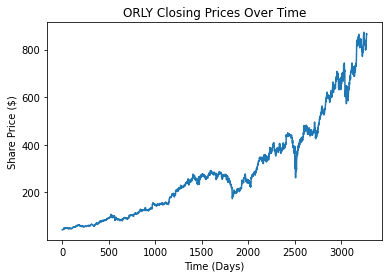

In [11]:
# view our starting data
plt.plot(data['Close'])
plt.title("ORLY Closing Prices Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.show()

In [12]:
# random forest parameter tuning - commented because it takes several minutes
# randomForestGrid = {
# 'n_estimators': [10, 20, 50, 100, 250, 500, 750, 1000, 2000],  
# 'max_depth': np.arange(1, 15, 1),  
# 'min_samples_split': [2, 5, 10], 
# 'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
# 'bootstrap': [True, False], 
# 'random_state': [1, 2, 30, 42]
# }
# rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=randomForestGrid, cv=3, n_jobs=-1, verbose=2, n_iter=200)
# rscvFit = rscv.fit(xTrain, yTrainRegress)
# bestParams = rscvFit.best_params_
# print(bestParams)

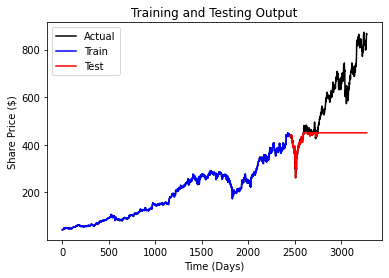

In [13]:
# Random Forest Model using regression (finding actual predicted values)
randomForests = RandomForestRegressor(random_state=30, n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=9, bootstrap=False)
randomForests.fit(xTrain, yTrainRegress)
trainRandomForestsPredict = randomForests.predict(xTrain)
yRandomForestsPredict = randomForests.predict(xTest)

testPredictPlot = np.empty_like(data['Close'])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainRandomForestsPredict):len(data)] = yRandomForestsPredict

# Plot the test predictions
plt.plot(data['Close'], color="black", label=f"Actual")
plt.plot(trainRandomForestsPredict, color="blue", label=f"Train")
plt.plot(testPredictPlot, color="red", label=f"Test")
plt.title("Training and Testing Output")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.legend()
plt.show()

In [18]:
# Random Forest Model using classification (whether it goes up or down)
randomForests = RandomForestClassifier(random_state=30, n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=9, bootstrap=False)
randomForests.fit(xTrain, yTrainClass)
yRandomForestsPredict = randomForests.predict(xTest)
print(accuracy_score(yTestClass, yRandomForestsPredict))

0.48473748473748474


In [15]:
# Naive Bayes
classifier = GaussianNB()
bayesModel = classifier.fit(xTrain, yTrainClass) # train
yBayesPredict = bayesModel.predict(xTest)
accuracy_score(yTestClass, yBayesPredict)

0.463980463980464

In [16]:
# KNN
knnModel = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(xTrain, yTrainClass) # need to look into the amount of neighbors and jobs
yKnnPredict = knnModel.predict(xTest)
accuracy_score(yTestClass, yKnnPredict)

0.4713064713064713

In [17]:
# SVM
svc = LinearSVC(C=1.0) # support vector classifier
svcModel = svc.fit(xTrain, yTrainClass)
svcPredict = svcModel.predict(xTest)
accuracy_score(yTestClass, svcPredict)

0.503052503052503